<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Which-type-of-correlation-to-use-for-my-continuous-data?" data-toc-modified-id="Which-type-of-correlation-to-use-for-my-continuous-data?-1">Which type of correlation to use for my continuous data?</a></span></li><li><span><a href="#Description-of-functions" data-toc-modified-id="Description-of-functions-2">Description of functions</a></span><ul class="toc-item"><li><span><a href="#get_outliers" data-toc-modified-id="get_outliers-2.1"><code>get_outliers</code></a></span><ul class="toc-item"><li><span><a href="#Input" data-toc-modified-id="Input-2.1.1"><em>Input</em></a></span></li><li><span><a href="#Output" data-toc-modified-id="Output-2.1.2"><em>Output</em></a></span></li></ul></li><li><span><a href="#do_correlation" data-toc-modified-id="do_correlation-2.2"><code>do_correlation</code></a></span><ul class="toc-item"><li><span><a href="#Input" data-toc-modified-id="Input-2.2.1"><em>Input</em></a></span></li><li><span><a href="#Output" data-toc-modified-id="Output-2.2.2"><em>Output</em></a></span></li></ul></li><li><span><a href="#plot_correlation" data-toc-modified-id="plot_correlation-2.3"><code>plot_correlation</code></a></span><ul class="toc-item"><li><span><a href="#Input" data-toc-modified-id="Input-2.3.1"><em>Input</em></a></span></li><li><span><a href="#Output" data-toc-modified-id="Output-2.3.2"><em>Output</em></a></span></li></ul></li></ul></li><li><span><a href="#Examples" data-toc-modified-id="Examples-3">Examples</a></span><ul class="toc-item"><li><span><a href="#xx" data-toc-modified-id="xx-3.1">xx</a></span></li></ul></li></ul></div>

# Which type of correlation to use for my continuous data?

When measuring an association between two variables, **Pearson's correlation** is the most popular for continuos data. However, if data has outliers or is not normally distributed, Perarson's correlation is not appropriate. Instead, robust correlation methods should be used, for example, **Spareman skipped** or **percentage-bend** correlation. On the other hand, if data is normally distributed and has no outliers, Perason's correlation gives more power. 
Here I provide a function that first inspects the data for outliers and normality and then choses the most appropriate of the three correlation methods. Based on [Pernet et al. (2013)](https://doi.org/10.3389/fpsyg.2012.00606 "Pernet, C. R., Wilcox, R. R., & Rousselet, G. A. (2013). Robust correlation analyses: false positive and power validation using a new open source matlab toolbox. Frontiers in psychology, 606."), I follow three simple rules of thumb for chosing the correlation method:
* **Pearson's correlation**: Data is normally distributed and has no outliers
* **Spearman skipped correlation**: Data has bi-variate outliers 
    * Using the minimum covariance determinant (MCD) estimator 
* **Percentage-bend correlation**: Data has no bi-variate outliers but is not normally distributed or has univariate outliers
    * (20%)

The **'Flexible Correlation'** script is available from my [GitHub repository](https://github.com/dcdace/R_functions/tree/main/flexible-correlations).

# Description of functions
`flexible_correlation.r` script contains three functions.

## `get_outliers`

**`get_outliers`** function checks for outliers in the data. It uses `boxplot` method to check for univariate outliers and `bagplot` method to check for bi-variate outliers.

### *Input*

`get_outliers(var1, var2, 
    var1name = NULL, 
    var2name = NULL, 
    var1ylab = NULL, 
    var2ylab = NULL, 
    disp = FALSE)`

`var1` and `var2` are numerical vectors, the two contanious variables that you want to correlate. 
`var1name` and `var2name` are strings; names of the variables to be displayed on boxplots
`var1ylab` and `var2ylab` are strings; y-axis lables for the two variables to be displayed on boxplots 
`disp` is logical (TRUE/FALSE). Whether you wanto display the outlier results (boxplots and bagplot).  

### *Output*

xx

## `do_correlation`

**`do_correlation`** function performes one of the three correlation methods. It uses the number of univariate and bi-variate outliers obtained from the `get_outlier` function. It perfomes `Shapiro test` to determin wether the data is normally distributed.

### *Input*

`do_correlation(var1, var2, 
    outliers = NULL)`

### *Output*

xxx

## `plot_correlation`

**`plot_correlation`** xx

### *Input*

`plot_correlation(var1, var2, 
    var1name = NULL, 
    var2name = NULL, 
    corRes = NULL,
    pointsize = 1.8, 
    txtsize = 11,
    outliers = NULL,
    plotoutliers = FALSE,
    pthreshold = NULL)`

### *Output*
xx

# Examples

## xx

In [53]:
suppressWarnings(
    suppressMessages(
        source("https://raw.githubusercontent.com/dcdace/R_functions/main/flexible-correlations/flex_corr.r")
    )
)

In [27]:
df <- mtcars
head(df)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


[1] "Weight (1000 lbs) outliers: 2"
[1] 16 17
[1] "Miles/(US) gallon outliers: 0"
numeric(0)
[1] "Bi-variate outliers: 1"
[1] 17


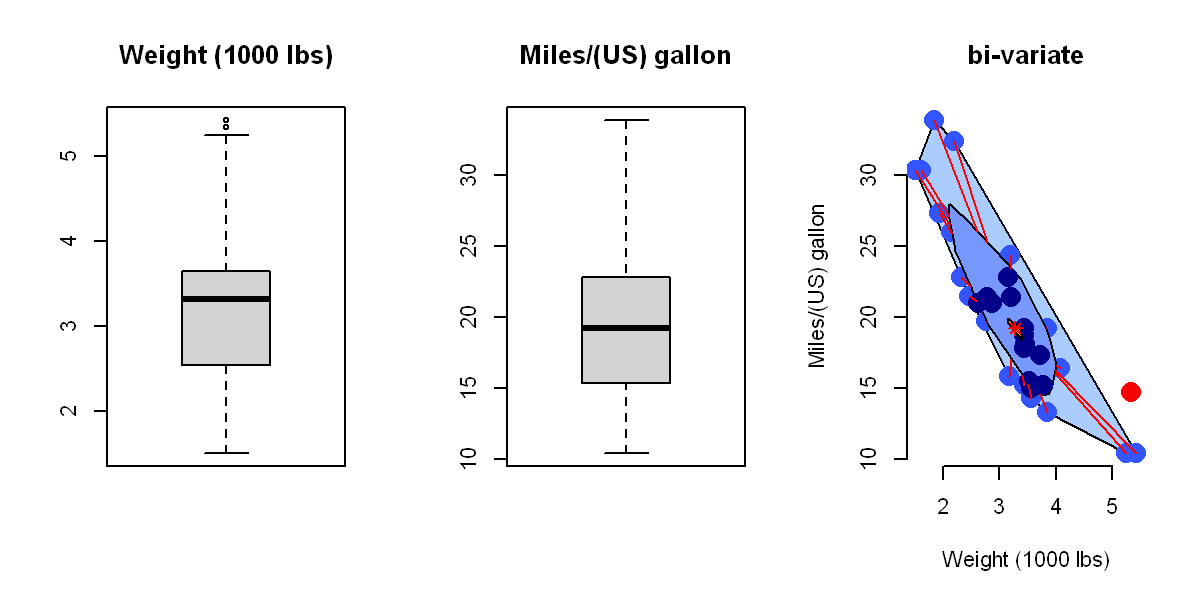

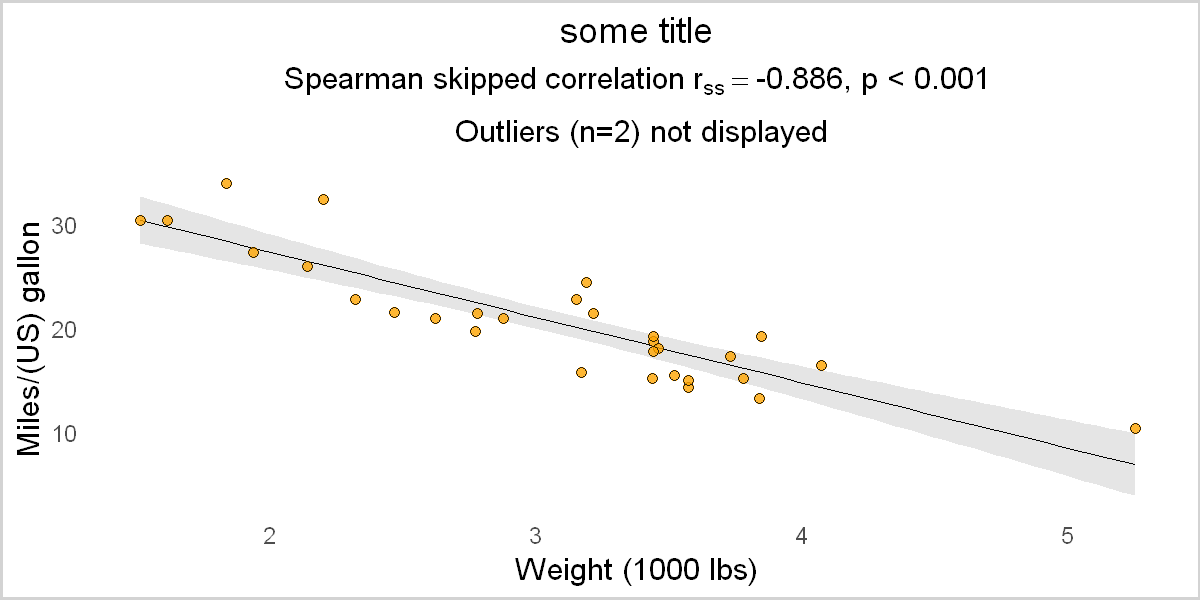

In [28]:
options(repr.plot.width = 6, repr.plot.height = 3, repr.plot.res = 200)

outliers <- get_outliers(
    df$wt, df$mpg, 
    var1name = "Weight (1000 lbs)", var2name = "Miles/(US) gallon", 
    disp = TRUE)
res <- do_correlation(df$wt, df$mpg)
plot_correlation(df$wt, df$mpg, 
                 var1name = "Weight (1000 lbs)", var2name = "Miles/(US) gallon", 
                 outliers = outliers, corRes = res) + 
labs(title = "some title")

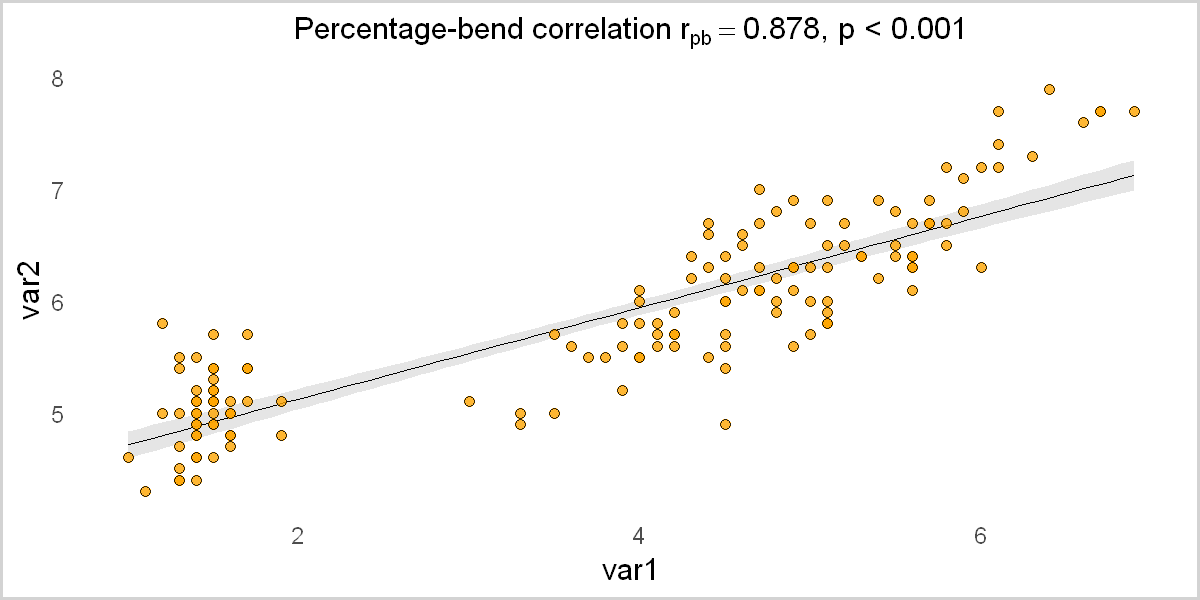

In [55]:
df <- iris
plot_correlation(df$Petal.Length, df$Sepal.Length)

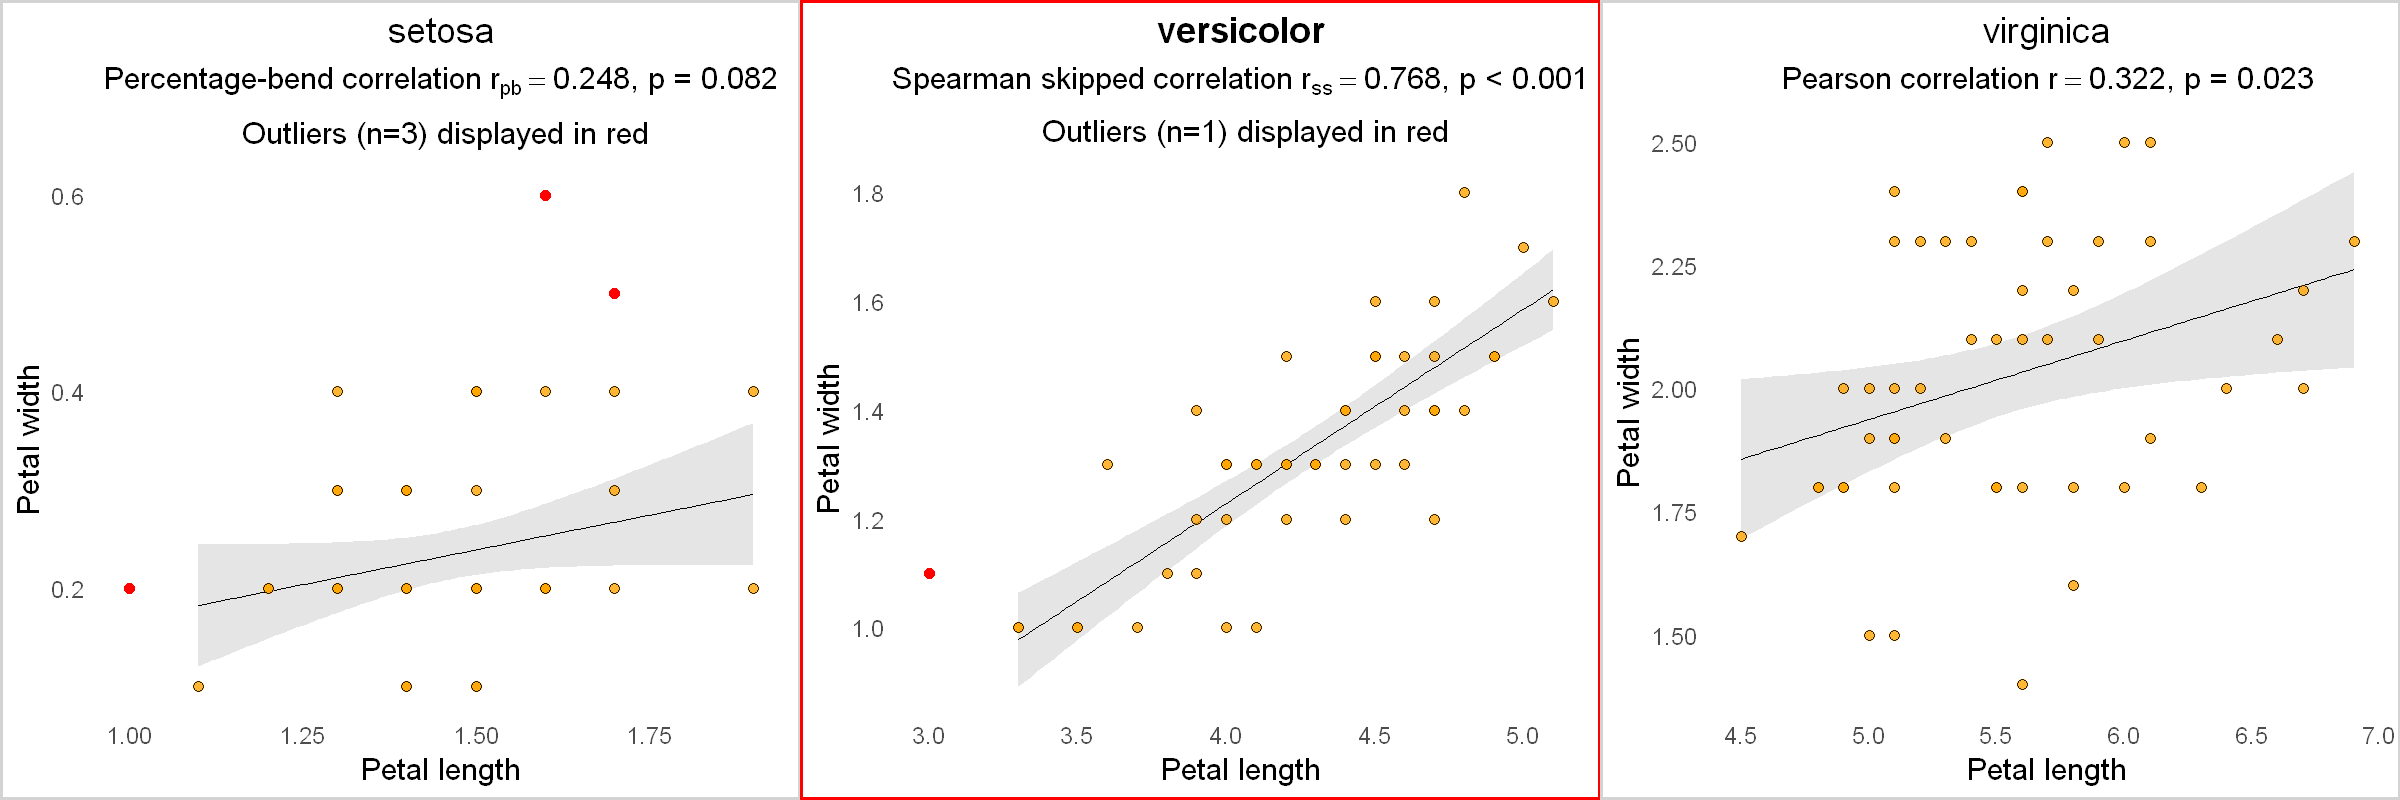

In [12]:
iris.species <- levels(df$Species)
nspecies <- length(iris.species)

options(repr.plot.width = 12, repr.plot.height = 4)

plotlist <- list()
    for (i in 1:nspecies) {
        ds <- subset(df, df$Species == iris.species[i])
        p <- plot_correlation(ds$Petal.Length, ds$Petal.Width, 
                              var1name = "Petal length", var2name = "Petal width",
                              plotoutliers = TRUE,
                              pthreshold = 0.05/nspecies) + 
        labs(title = iris.species[i])
        
        plotlist[[i]] <- p
        }
        gridExtra::grid.arrange(grobs = plotlist, nrow = 1)